* 最值归一化 适用于有明显分布的边界的情况，缺点：如果边界域过大，则不适用于该方法
* 均值方差归一化 strandardizatioin.把所有数据归一化到均值为0方差为1的分布中。数据分布无明显分布情况，或者极端值情况（建议使用这种归一化）x-u/s

In [1]:
## 最值归一化

In [2]:
import numpy as np

In [3]:
x = np.random.randint(0, 100, size=100)

In [4]:
(x - np.min(x))/(np.max(x) - np.min(x))

array([0.375     , 0.72916667, 0.21875   , 1.        , 0.42708333,
       0.05208333, 0.76041667, 0.72916667, 0.47916667, 0.69791667,
       0.84375   , 0.69791667, 0.17708333, 0.72916667, 0.0625    ,
       0.1875    , 0.35416667, 0.41666667, 0.72916667, 0.25      ,
       0.36458333, 0.55208333, 0.54166667, 0.36458333, 0.875     ,
       0.25      , 0.52083333, 0.39583333, 0.36458333, 0.21875   ,
       0.32291667, 0.90625   , 0.53125   , 0.47916667, 0.58333333,
       0.32291667, 0.09375   , 0.80208333, 0.09375   , 0.40625   ,
       0.63541667, 0.01041667, 0.44791667, 0.55208333, 0.28125   ,
       0.0625    , 0.27083333, 0.51041667, 0.57291667, 0.44791667,
       0.29166667, 0.46875   , 0.35416667, 0.02083333, 0.21875   ,
       0.11458333, 0.75      , 0.28125   , 1.        , 0.84375   ,
       0.375     , 0.66666667, 0.        , 0.91666667, 0.72916667,
       0.30208333, 0.47916667, 1.        , 0.26041667, 0.17708333,
       0.04166667, 0.45833333, 0.69791667, 0.875     , 0.11458

In [5]:
x = np.random.randint(0, 100, size=(50, 2))

In [6]:
x =np.array(x, dtype='float')

In [8]:
x[:, 0] = (x[:, 0] - np.min(x[:, 0]))/(np.max(x[:, 0]) - np.min(x[:, 0]))

In [9]:
x[:, 1] = (x[:, 1] - np.min(x[:, 1]))/(np.max(x[:, 1]) - np.min(x[:, 1]))

In [10]:
x[:10, :]

array([[0.49494949, 0.26315789],
       [0.52525253, 0.64210526],
       [0.33333333, 0.94736842],
       [0.3030303 , 0.77894737],
       [0.87878788, 0.72631579],
       [0.95959596, 0.05263158],
       [0.37373737, 0.65263158],
       [0.28282828, 0.26315789],
       [0.72727273, 0.48421053],
       [0.18181818, 0.06315789]])

In [13]:
np.mean(x[:, 0])

0.49434343434343425

In [14]:
np.mean(x[:, 1])

0.48021052631578953

In [15]:
np.std(x[:, 0])

0.264078424998211

In [16]:
np.std(x[:, 1])

0.27671912417505684

## 均值方差归一化

In [17]:
x2 = np.random.randint(0, 100, size=(50, 2))

In [18]:
x2 = np.array(x2, dtype='float')

In [20]:
x2[:, 0] = (x2[:, 0] - np.mean(x2[:, 0]))/np.std(x2[:, 0])

In [21]:
x2[:, 1] = (x2[:, 1] - np.mean(x2[:, 1]))/np.std(x2[:, 1])

In [22]:
import matplotlib.pyplot as plt

In [24]:
x2.shape

(50, 2)

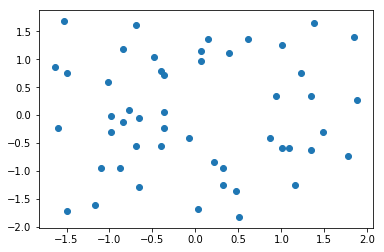

In [26]:
plt.scatter(x2[:, 0], x2[:, 1])

In [28]:
np.mean(x2[:, 0])

7.549516567451065e-17

In [29]:
np.std(x2[:, 0])

1.0

In [30]:
np.std(x2[:, 1])

1.0

# 测试数据集归一化

(x_test - mean_train)/std_train 而不是 (x_test - mean_test)/std_test
因为测试数据是模拟真实环境，真实环境很可能无法得到所有测试数据的均值和方差

保存训练数据集的方差和均值的方法为sklearn 中的scale

* 注：如果训练数据归一化，则测试数据也一定要归一化

In [33]:
import numpy as np
from sklearn import datasets

In [34]:
iris = datasets.load_iris()

In [35]:
x = iris.data
y = iris.target

In [36]:
from  sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666, stratify=y)

## scikit-lean 中的standardScaler
其他方法 还有MinMaxScaler

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
standartScaler = StandardScaler()

In [42]:
standartScaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
standartScaler.mean_

array([5.855     , 3.05666667, 3.7525    , 1.18916667])

scale_得到方差向量

In [46]:
standartScaler.scale_

array([0.83104853, 0.44958005, 1.77007356, 0.7621019 ])

In [47]:
standartScaler.transform(x_train)

array([[-0.06618145, -0.79333295,  0.08332987,  0.01421507],
       [ 0.05414846,  0.31881604,  0.59178331,  0.80151136],
       [-0.06618145, -0.57090315,  0.7612678 ,  1.58880766],
       [-0.4271712 , -1.23819254,  0.1398247 ,  0.14543112],
       [ 0.65579804,  0.09638625,  0.9872471 ,  0.80151136],
       [-0.18651137, -0.12604355,  0.25281435,  0.01421507],
       [-1.02882078,  0.76367564, -1.27254598, -1.29794542],
       [-1.63047036, -1.68305214, -1.38553564, -1.16672937],
       [ 0.29480829, -0.12604355,  0.64827814,  0.80151136],
       [-1.02882078,  0.54124584, -1.32904081, -1.29794542],
       [-0.90849086,  0.98610544, -1.32904081, -1.16672937],
       [ 1.01678779,  0.09638625,  0.53528849,  0.40786322],
       [-0.06618145, -1.01576275,  0.1398247 ,  0.01421507],
       [-0.06618145,  2.09825443, -1.44203046, -1.29794542],
       [ 0.77612796, -0.12604355,  1.15673159,  1.32637556],
       [-0.54750112,  1.87582463, -1.15955633, -1.03551332],
       [-0.06618145, -0.

In [48]:
x_train

array([[5.8, 2.7, 3.9, 1.2],
       [5.9, 3.2, 4.8, 1.8],
       [5.8, 2.8, 5.1, 2.4],
       [5.5, 2.5, 4. , 1.3],
       [6.4, 3.1, 5.5, 1.8],
       [5.7, 3. , 4.2, 1.2],
       [5. , 3.4, 1.5, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.3, 1.4, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [5.8, 4. , 1.2, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [5.4, 3.9, 1.7, 0.4],
       [5.8, 2.7, 5.1, 1.9],
       [6.7, 3.1, 5.6, 2.4],
       [5.7, 2.5, 5. , 2. ],
       [4.6, 3.6, 1. , 0.2],
       [5.9, 3. , 5.1, 1.8],
       [6.2, 2.2, 4.5, 1.5],
       [5. , 3. , 1.6, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [7.2, 3. , 5.8, 1.6],
       [5.7, 3.8, 1.7, 0.3],
       [4.9, 3. , 1.4, 0.2],
       [5. , 2. , 3.5, 1. ],
       [7.9, 3.8, 6.4, 2. ],
       [5.5, 2.6, 4.4, 1.2],
       [6.6, 3. , 4.4, 1.4],
       [6.3, 3.3, 6. , 2.5],
       [4.7, 3

In [49]:
x_train = standartScaler.transform(x_train)

In [50]:
x_test_standard = standartScaler.transform(x_test)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [53]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [54]:
knn_clf.score(x_test_standard, y_test)

0.9333333333333333

In [55]:
knn_clf.score(x_test, y_test)

0.3333333333333333